*   Perform Standarization from scratch and by sklearn
*   Perform Normalization from scratch and by sklearn
*   Analyze how feature scaling helps in perspective , create a box plot (raw  data, standarized data and normalized data)


In [54]:
import pandas as pd

In [55]:
df = pd.read_csv('/content/data_task1.csv')

In [56]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [58]:
df['Outlet_Establishment_Year'] = df['Outlet_Establishment_Year'].astype(str)

In [59]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year     object
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [60]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [61]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)

df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [62]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

print(numerical_columns)

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'], dtype='object')


Standarization from scratch

In [63]:
standardized_df = df.copy()

for column in numerical_columns:
  mean_value = standardized_df[column].mean()
  std_value = standardized_df[column].std()

  standardized_df[column] = (standardized_df[column] - mean_value) / std_value

In [64]:
standardized_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,-0.841822,Low Fat,-0.970675,Dairy,1.747351,OUT049,1999,Medium,Tier 1,Supermarket Type1,0.910548
1,DRC01,-1.641610,Regular,-0.908058,Soft Drinks,-1.488936,OUT018,2009,Medium,Tier 3,Supermarket Type2,-1.018381
2,FDN15,1.098490,Low Fat,-0.956861,Meat,0.010040,OUT049,1999,Medium,Tier 1,Supermarket Type1,-0.049235
3,FDX07,1.500750,Regular,-1.281683,Fruits and Vegetables,0.660011,OUT010,1998,Medium,Tier 3,Grocery Store,-0.849053
4,NCD19,-0.929373,Low Fat,-1.281683,Household,-1.399138,OUT013,1987,High,Tier 3,Supermarket Type1,-0.695332


Standarization by sklearn

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
data1 = df.copy()

In [67]:
scaler = StandardScaler()

data1[numerical_columns]= scaler.fit_transform(data1[numerical_columns])

data1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,-0.841872,Low Fat,-0.970732,Dairy,1.747454,OUT049,1999,Medium,Tier 1,Supermarket Type1,0.910601
1,DRC01,-1.641706,Regular,-0.908111,Soft Drinks,-1.489023,OUT018,2009,Medium,Tier 3,Supermarket Type2,-1.018440
2,FDN15,1.098554,Low Fat,-0.956917,Meat,0.010040,OUT049,1999,Medium,Tier 1,Supermarket Type1,-0.049238
3,FDX07,1.500838,Regular,-1.281758,Fruits and Vegetables,0.660050,OUT010,1998,Medium,Tier 3,Grocery Store,-0.849103
4,NCD19,-0.929428,Low Fat,-1.281758,Household,-1.399220,OUT013,1987,High,Tier 3,Supermarket Type1,-0.695373


Normalization from scratch

In [68]:
normalized_df = df.copy()

for column in numerical_columns:
  min_value = normalized_df[column].min()
  max_value = normalized_df[column].max()

  normalized_df[column] = (normalized_df[column] - min_value) / (max_value - min_value)

In [69]:
normalized_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,0.282525,Low Fat,0.048866,Dairy,0.927507,OUT049,1999,Medium,Tier 1,Supermarket Type1,0.283587
1,DRC01,0.081274,Regular,0.058705,Soft Drinks,0.072068,OUT018,2009,Medium,Tier 3,Supermarket Type2,0.031419
2,FDN15,0.770765,Low Fat,0.051037,Meat,0.468288,OUT049,1999,Medium,Tier 1,Supermarket Type1,0.158115
3,FDX07,0.871986,Regular,0.000000,Fruits and Vegetables,0.640093,OUT010,1998,Medium,Tier 3,Grocery Store,0.053555
4,NCD19,0.260494,Low Fat,0.000000,Household,0.095805,OUT013,1987,High,Tier 3,Supermarket Type1,0.073651


Normalization by sklearn

In [70]:
from sklearn.preprocessing import MinMaxScaler

In [71]:
scaler = MinMaxScaler()

In [72]:
data2 = df.copy()

data2[numerical_columns]= scaler.fit_transform(data2[numerical_columns])

data2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,0.282525,Low Fat,0.048866,Dairy,0.927507,OUT049,1999,Medium,Tier 1,Supermarket Type1,0.283587
1,DRC01,0.081274,Regular,0.058705,Soft Drinks,0.072068,OUT018,2009,Medium,Tier 3,Supermarket Type2,0.031419
2,FDN15,0.770765,Low Fat,0.051037,Meat,0.468288,OUT049,1999,Medium,Tier 1,Supermarket Type1,0.158115
3,FDX07,0.871986,Regular,0.000000,Fruits and Vegetables,0.640093,OUT010,1998,Medium,Tier 3,Grocery Store,0.053555
4,NCD19,0.260494,Low Fat,0.000000,Household,0.095805,OUT013,1987,High,Tier 3,Supermarket Type1,0.073651


Anaysis

In [73]:
import matplotlib.pyplot as plt

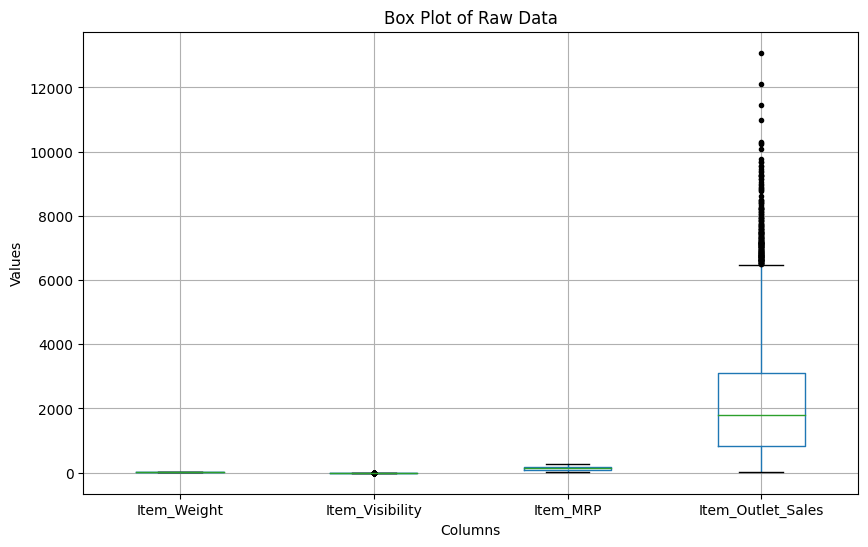

In [74]:
data_for_boxplot = df[numerical_columns]

plt.figure(figsize=(10, 6))

data_for_boxplot.boxplot(sym='k.')

plt.title('Box Plot of Raw Data')
plt.xlabel('Columns')
plt.ylabel('Values')

plt.show()


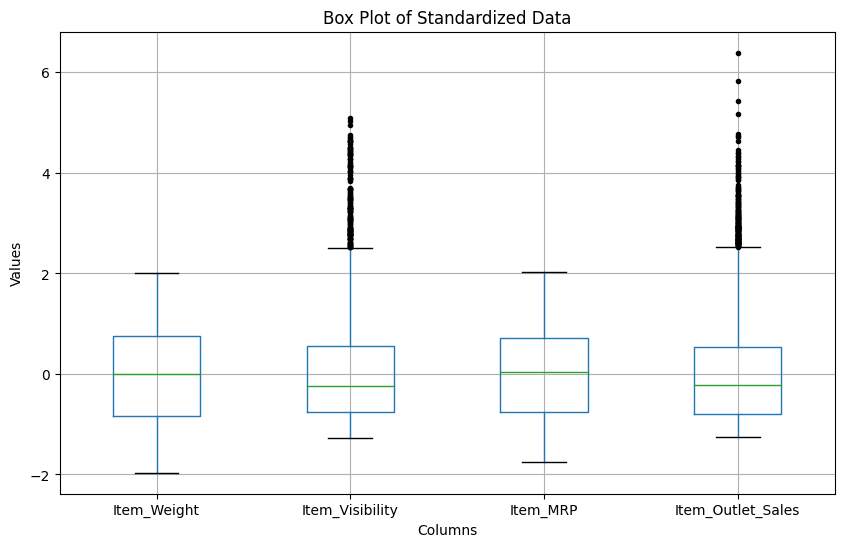

In [75]:
standardized_data = standardized_df[numerical_columns]

plt.figure(figsize=(10, 6))

standardized_data.boxplot(sym='k.')

plt.title('Box Plot of Standardized Data')
plt.xlabel('Columns')
plt.ylabel('Values')

plt.show()

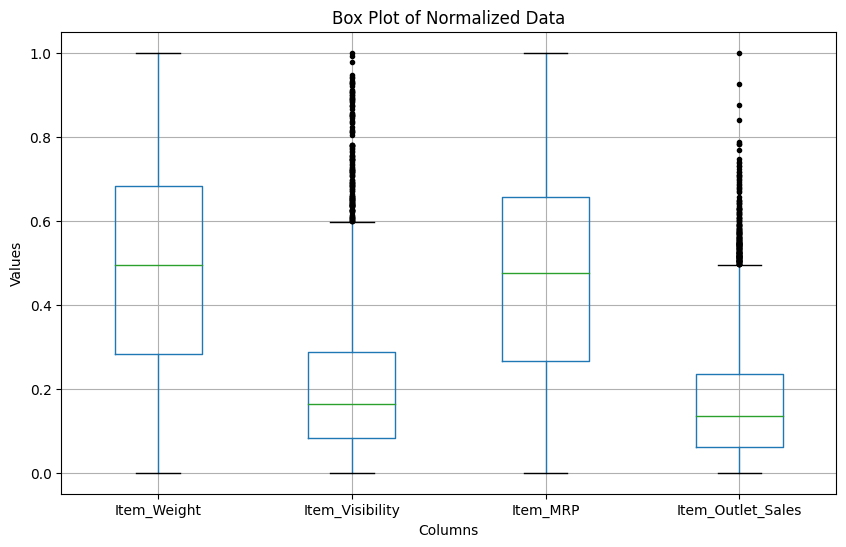

In [76]:
plt.figure(figsize=(10, 6))

normalized_df[numerical_columns].boxplot(sym='k.')

plt.title('Box Plot of Normalized Data')
plt.xlabel('Columns')
plt.ylabel('Values')

plt.show()